In [3]:
import pandas as pd
!pip install plotly
import plotly.offline as pyoff
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import sys
!pip install --upgrade seaborn
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

Requirement already up-to-date: seaborn in c:\programdata\anaconda3\lib\site-packages (0.11.1)


# Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. 
To fight churn, Model Fitness has digitized a number of its customer profiles. 

**Goal:**

- Analyze customer profiles and come up with a customer retention strategy.

**Steps:**

- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:

# Dataset description

- `Churn` — the fact of churn for the month in question( 1-client quit,0-not quit)

**User data for the preceding month**

- `gender`
- `Near_Location` — whether the user lives or works in the neighborhood where the gym is located
- `Partner` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- `Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- `Phone` — whether the user provided their phone number
- `Age`
- `Lifetime` — the time (in months) since the customer first came to the gym

**Data from the log of visits and purchases and data on current membership status**

 - `Contract_period` — 1 month, 3 months, 6 months, or 1 year
 - `Month_to_end_contract` — the months remaining until the contract expires
 - `Group_visits` — whether the user takes part in group sessions
 - `Avg_class_frequency_total` — average frequency of visits per week over the customer's lifetime
 - `Avg_class_frequency_current_month` — average frequency of visits per week over the preceding month
 - `Avg_additional_charges_total` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

In [4]:
df=pd.read_csv('https://code.s3.yandex.net//datasets/gym_churn_us.csv')

In [5]:
display(df.head())
df.info()
display(df[df.duplicated()])
display(df.describe())
display(df.pivot_table(index='Partner',values='Promo_friends'))
display(df.pivot_table(index='Promo_friends',values='Partner'))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


,Promo_friends
Partner,
0,0.105212
1,0.522856


,Partner
Promo_friends,
0,0.335864
1,0.824959


- We have a dataset of 4000 users, without missings and duplicates.
- It is gender-balanced and it is only young people, the oldest customer is 41, the average age is 29.
- The average user comes twice a week
- Most of the gym members (85%)live or work in the neighborhood. 31% signed through promo code offer if bringing a friend, big chance, that this "friend" is a colleague (82% of people, that signed this way work in a partner company).
- A lot of clients don't use long commitment contracts,50% or more sign just for a month. For 75% or more contract will end in a month. The average lifetime of customers in the dataset is 3 month

## Characteristics of those who left

In [7]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546



Comparing users, that left the gym and those who stayed, we can see the importance of social involvement. People, who left, rarely came from "promo friends" and rarely were a part of the "partner" company, they also less likely to go to group visits. Inconvenient location probably has not a straight relation with it, although the percentage of people who don't live or work near is higher in the group of people who left the gym, the difference doesn't seem very high. It is mostly newcomers, at least half of them left in the first month. They tend to come to the gym rarer, than "regular" customers, which is even more prominent last month before leaving.

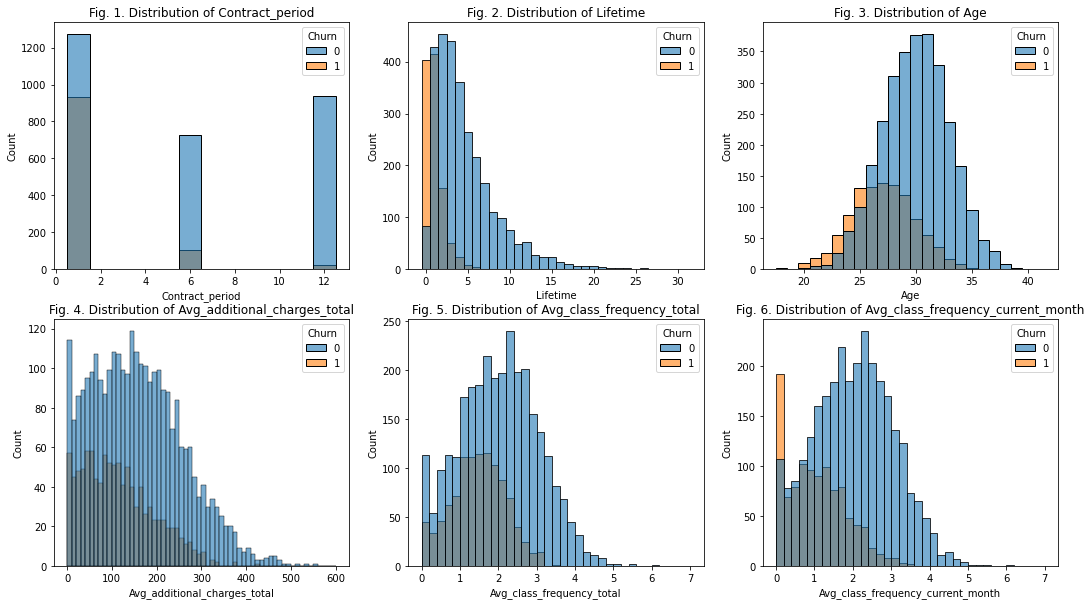

In [8]:
fig, axs = plt.subplots(2, 3,figsize=(18, 10))
notbinar = ['Contract_period',  'Lifetime','Age', 'Avg_additional_charges_total', 'Avg_class_frequency_total','Avg_class_frequency_current_month']
rows = [0,1]
cols = [0,1,2]
index_row = 0
index_col = 0

for i in range(len(notbinar)):
    #if notbinar[i]=='Churn':
        #continue
    #else:
        binwidth = 1
        binrange = [min(df[notbinar[i]])-0.5,max(df[notbinar[i]])+0.5]
        if notbinar[i] == 'Avg_additional_charges_total':
            binwidth = 10
            binrange = [0.,600.]
        if notbinar[i] == 'Avg_class_frequency_total':
            binwidth = 0.2
            binrange = [0.,7.]
        if notbinar[i] == 'Avg_class_frequency_current_month':
            binwidth = 0.2
            binrange = [0.,7.]    
        sns.histplot(data=df, x=notbinar[i], hue="Churn",  alpha=0.6, binwidth=binwidth, binrange=binrange,ax=axs[rows[index_row],cols[index_col]])
        axs[rows[index_row],cols[index_col]].set_title("Fig. "+ str(i+1) + ". Distribution of "+ notbinar[i])
        
        if index_col < len(cols)-1:
            index_col += 1
        else:
            index_col = 0
            index_row+=1
        
plt.show();

Figs. 1-6 show the comparison of distributions of several features between users who left the gym (orange bars) and regular users (blue bars). Let's dive into them deeper. One can see from Fig.1 that the contract type of the users who left the gym skewed towards one month contract. Most of them were not sure if they want to continue even a month before. Fig. 2 shows, that most of the customers who left the gym do it in the first-second month. After this dangerous period is over, we can be more sure about our clients. From Fig. 3 one can see, that among younger people (up to the age of 27) there are more customers left than among older. Fig. 4 shows, that they spent less money on additional services, but it could be just because they have been involved with the company for less time, we don't have information about the average check. Analyzing mean values we already identified, that people who will leave the gym come to the gym fewer times in a week than others (it is also confirmed by the distribution shown in Fig. 5). Fig.6 shows that a lot of them just never came at all in the last month. It can be an alarming sign.

<AxesSubplot:title={'center':'Fig. 7. Correlation matrix'}>

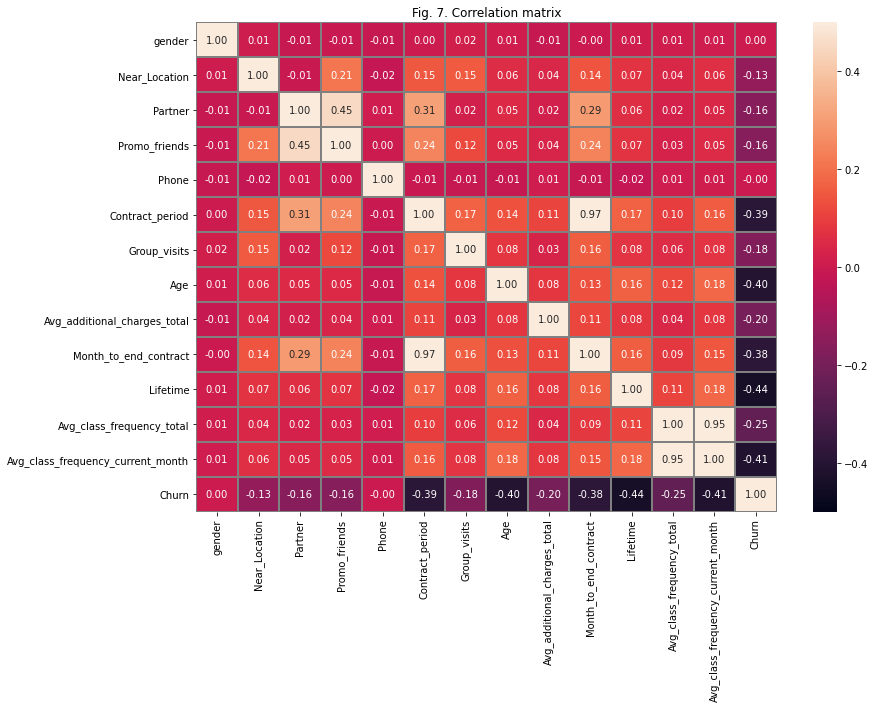

In [9]:
corr=df.corr()
plt.figure(figsize=(13, 9))
plt.title('Fig. 7. Correlation matrix')
sns.heatmap(corr, annot = True, fmt='.2f', linewidths=1, linecolor='gray',vmin=-0.5, vmax=0.5)

Although frequency at last month, lifetime as a client, age, and contract period has a stronger correlation with churn than others, there is no parameter strongly correlated with churn, therefore it can't be explained by one factor. Parameters do not strongly correlate with each other either.

# Prediction of churn

In [10]:
X = df.drop(columns = ['Churn'], axis=1)
y = df['Churn']
 
# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
 
 
# create a StandardScaler object and apply it to train set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

grid_params = {
    'penalty':['l2','l1'],
    'C':[0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5],
    'max_iter':range(100,300,10)
}

In [11]:
grid = GridSearchCV(LogisticRegression(random_state=0), grid_params,n_jobs=-1,scoring='f1') 
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4,
                               1.5],
                         'max_iter': range(100, 300, 10),
                         'penalty': ['l2', 'l1']},
             scoring='f1')

In [12]:
grid.best_params_

{'C': 1.4, 'max_iter': 210, 'penalty': 'l2'}

In [13]:
grid.best_score_

0.8709402412679037

In [14]:
grid_params_RF = {
    'n_estimators':range(100,300,10),
    'criterion':['gini', 'entropy'],
    'max_depth':range(2,20,1)
}

In [22]:
grid_RF = GridSearchCV(RandomForestClassifier(random_state=0), grid_params_RF,n_jobs=-1,scoring='f1') 
grid_RF.fit(X_train, y_train)
grid_RF.best_params_

{'criterion': 'gini', 'max_depth': 19, 'n_estimators': 100}

In [16]:
grid_RF.best_score_

0.8428485503923213

In [25]:
params_lr = {'C': 1.4, 'max_iter': 210, 'penalty': 'l2'}
params_rf = {'criterion': 'gini', 'max_depth': 19, 'n_estimators': 100}

In [26]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
models = [LogisticRegression,  RandomForestClassifier]
prob = []
for i in models:
    parameters = params_lr
    if i == RandomForestClassifier: 
        parameters = params_rf
    model=i(**parameters,random_state=0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    probs= model.predict_proba(X_test) 
    prob.append(probs)
    print (i)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 0.92
Precision: 0.85
Recall: 0.82
F1: 0.84
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83


In [27]:
lr_probs = prob[0]
rf_probs = prob[1]

lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]

# ROC curve
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

#Precision-Recall curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)

lr_auc_pr = auc(lr_recall, lr_precision)
rf_auc_pr = auc(rf_recall, rf_precision)

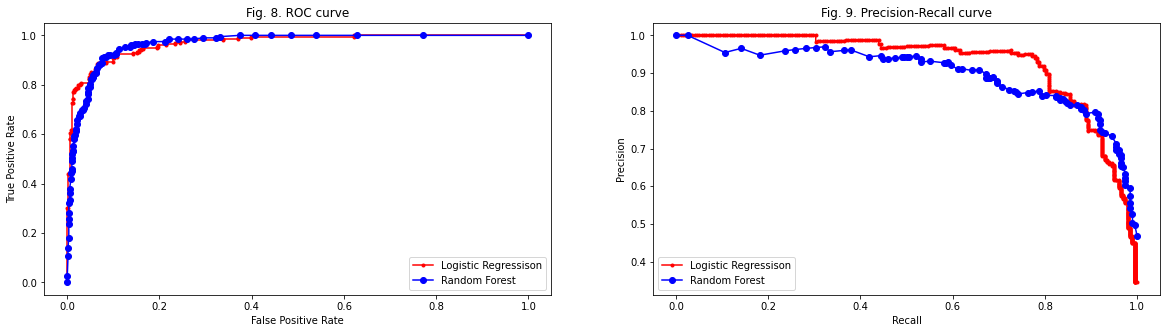

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regressison',color='r')
ax1.plot(rf_fpr, rf_tpr, marker='o', label='Random Forest',color='b')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title("Fig. 8. ROC curve")
ax1.legend()


ax2.plot(lr_recall, lr_precision, marker='.', label='Logistic Regressison',color='r')
ax2.plot(rf_recall, rf_precision, marker='o', label='Random Forest',color='b')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title("Fig. 9. Precision-Recall curve")
ax2.legend()
plt.show();

In [29]:
print('Area under ROC for Logistic Regression: auc=%.3f' % (lr_auc))
print('Area under ROC for Random Forest: auc=%.3f' % (rf_auc))

print('Area under Precision-Recall for Logistic Regression: auc=%.3f' % (lr_auc_pr))
print('Area under Precision-Recall for Random Forest: auc=%.3f' % (rf_auc_pr))

Area under ROC for Logistic Regression: auc=0.969
Area under ROC for Random Forest: auc=0.968
Area under Precision-Recall for Logistic Regression: auc=0.929
Area under Precision-Recall for Random Forest: auc=0.900


To predict the target variable, two classification algorithms (Random Forest Classifier and Logistic Regression) were tested. There are several loss functions by which their performance can be estimated. Since the classes in the target variable are imbalanced, it seems that the best metrics can be the f-score and the area under the Precision-Recall curve. The dataset was split into the train (80%) and test (20%) data samples.

To select the best model parameters, the 5-fold cross-validation procedure, which optimizes the f-score, was implemented on the training dataset. After that, both models were tested by applying them to the test data sample and several basic loss functions (accuracy, precision, recall, and f-score) were calculated. Fig. 8-9 show the ROC and Precision-Recall curves respectively for Random Forest (blue line and markers) and Logistic Regression (red line and markers). The area under those curves also was calculated. Based on all the metrics, one can conclude that the Logistic Regression algorithm wins this time. Main metrics, f-score, and area under Precision-Recall curve, shows that the performance of Logistic Regression is a little better, although not significantly. Anyway, metrics are quite good and a model can be used for the prediction of churn.

## Classification of typical users

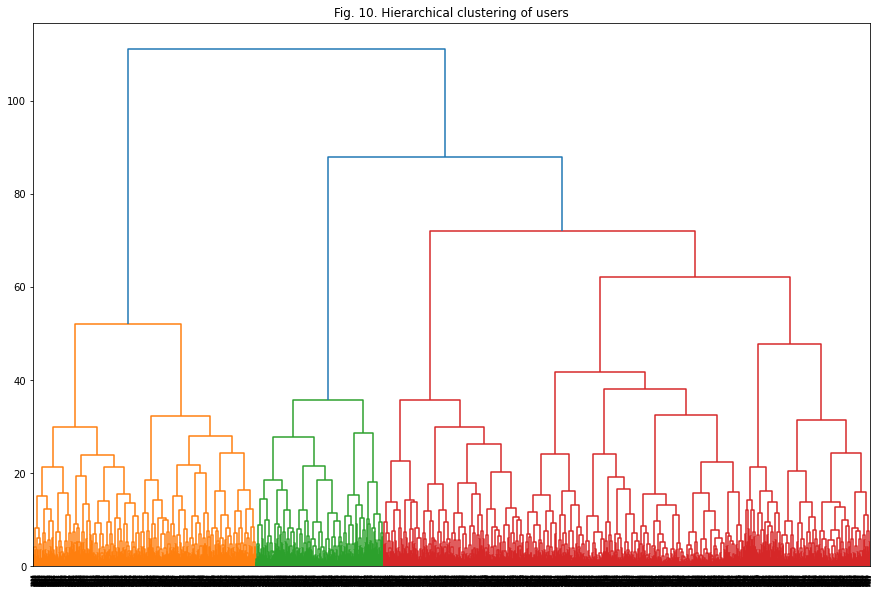

In [23]:
X_cl = X.drop(columns = ['Phone'], axis=1)
sc = StandardScaler()
x_sc = sc.fit_transform(X_cl)
linked = linkage(x_sc, method='ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Fig. 10. Hierarchical clustering of users')
plt.show()

There are three clusters here, that unite with each other one by one. We would use this number to determine the number of clusters to k-means clustering.

cluster_km,0,1,2
gender,0.486634,0.508787,0.545298
Near_Location,0.758809,0.939749,0.870578
Partner,0.379708,0.774895,0.341674
Promo_friends,0.185298,0.567364,0.216566
Phone,0.907047,0.898745,0.903365
Contract_period,1.876671,10.704603,2.453840
Group_visits,0.289186,0.540586,0.454702
Age,28.070474,29.891213,30.037101
Avg_additional_charges_total,128.411042,162.048241,157.689980
Month_to_end_contract,1.786756,9.791632,2.285591


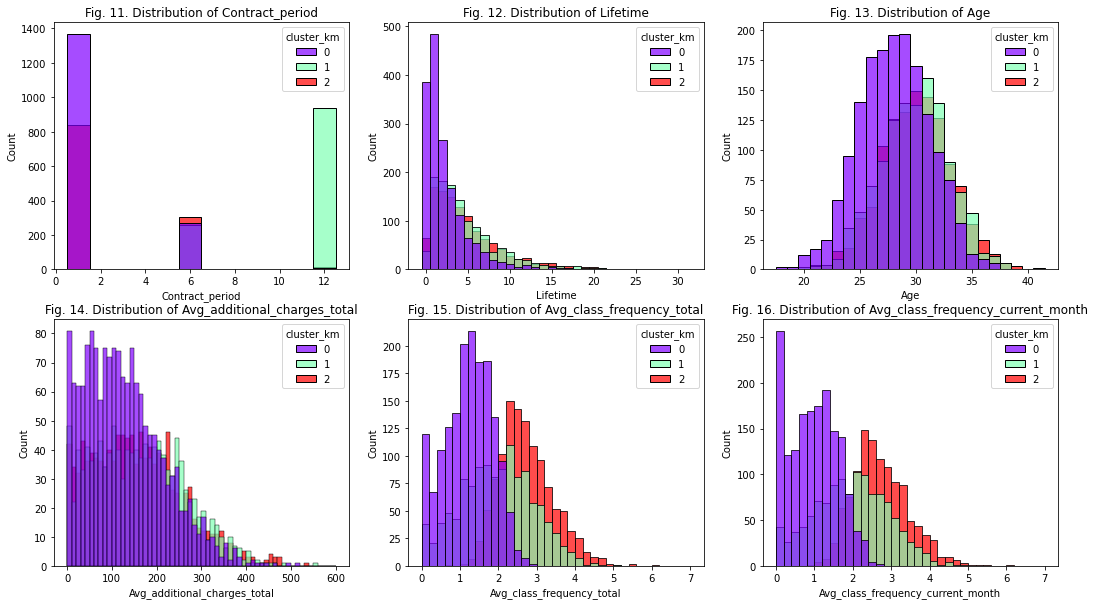

In [24]:
X_cl = X.drop(columns = ['Phone'], axis=1)
#X_sc = sc.fit_transform(X)
sc = StandardScaler()
x_sc = sc.fit_transform(X_cl)

km = KMeans(n_clusters = 3, random_state=0)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(x_sc)

# store cluster labels in the field of our dataset
df['cluster_km'] = labels

# print the statistics of the mean feature values per cluster
cl_table=(df.groupby(['cluster_km']).mean().T)
display(cl_table)
fig, axs = plt.subplots(2, 3,figsize=(18, 10))
notbinar = ['Contract_period',  'Lifetime','Age', 'Avg_additional_charges_total', 'Avg_class_frequency_total','Avg_class_frequency_current_month']
rows = [0,1]
cols = [0,1,2]
index_row = 0
index_col = 0
for i in range(len(notbinar)):
    binwidth = 1
    binrange = [min(df[notbinar[i]])-0.5,max(df[notbinar[i]])+0.5]
    if notbinar[i] == 'Avg_additional_charges_total':
        binwidth = 10
        binrange = [0.,600.]
    if notbinar[i] == 'Avg_class_frequency_total':
        binwidth = 0.2
        binrange = [0.,7.]
    if notbinar[i] == 'Avg_class_frequency_current_month':
        binwidth = 0.2
        binrange = [0.,7.]    
    sns.histplot(data=df, x=notbinar[i],hue="cluster_km",  alpha=0.7,palette='rainbow', binwidth=binwidth, binrange=binrange,ax=axs[rows[index_row],cols[index_col]])
    #axs[rows[index_row],cols[index_col]].set_title("Distribution of "+ notbinar[i])
    axs[rows[index_row],cols[index_col]].set_title("Fig. "+ str(i+11) + ". Distribution of "+ notbinar[i])
        
    if index_col < len(cols)-1:
        index_col += 1
    else:
        index_col = 0
        index_row+=1
        
plt.show();

People at cluster 1 *loyal and socially involved*. They have found their gym and they are sure about it(churn in this group only 3%). They buy long-term contracts: mostly for 12 months, sometimes for 6 (Fig.11). 77% of them came through partner companies and more than half(57%) came by promo of friends. Also, more than half(54%) of them go to group classes.

The second cluster is a *gym enthusiast*. On average they come to the gym 3 times a week (in Fig. 15 and 16 one can see how distribution skewed to bigger numbers). Churn in this group is also very small (9%), these people are too addicted to the gym to quit (although some of them can go to competitors).

Cluster number 0 neither that social involved as cluster #1, neither that crazy about the sport as cluster #2, both of these factors put them in *danger of leaving the gym*. 56 % Half of them Only 18% of them came through friend and only 29% visit group classes. They tend to buy short-time contracts, mostly for 1 month. A lot of the newcomers(Fig. 12) and, even though we can find people of all ages in this group, Fig.13 shows, that distribution is skewed towards young people. But the main difference of this cluster from others can be seen in Fig.15 and 16: these people come to the gym much more rarely, than others on average 1 time a week(and always less than 3) and for last month even less.

# Conclusions

We have a model, that can predict with a high probability if the client in danger of quitting the gym next month, so we can focus our retention effort on them. Most of our retention policy should be concentrated on people, who haven't come for a long time, usually, people quit at first 2 months. We don't know exactly from this research, what stopped this person from the continuation of using the gym. Maybe they just don't have a habit of going to the gym and our goal is not to make ourselves better/cheaper or anything else than other gyms but to help them with forming this habit. Another reason could be that they are expecting better results from the first month. Both those problems could partly help trainers (we can propose a cheap trainer programmer for newcomers). Another characteristic of the typical person who is leaving the gym is that he/she is not socially involved with other people in the gym (not a part of a partner company program or come with a friend). The trainer also could help with that. Possibly even better would be classed with a trainer in small groups, including interactions between clients, which allow them to build some connections and stimulate them to continue going to the gym they already know.